In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
#CNN 
import tensorflow as tf

In [4]:
mnist=tf.keras.datasets.mnist

# Modified National Institute of Standards and Technology database 

# It has a collection of greyscall images with handwritten digits from 0 to 9

In [5]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\SHANMUKH\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [18]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [8]:
# x_train,x_test=x_train/255.0,x_test/255.0
#1.) Why to divide by 255
# When we are working with image data,the pixel values are integers in the range [0,255].
# So divide it by 255.0 scales these values to the range [0,1]
# Working with the smaller values increase the stability of optimization algorithm

# tf.keras.layers.Dense(128,activation='relu')
#2.)Why 128 
# It is the specific number of nuerons or units in the dense layer
# relu -->Rectified Linear Unit,It helps to add non-lib=nearity to our algorithm

In [21]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [22]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2902 - accuracy: 0.9174
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1385 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1043 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0868 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0736 - accuracy: 0.9776


In [23]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9755


In [24]:
print(test_loss)
print(test_accuracy)

0.07576415687799454
0.9754999876022339


In [13]:
# Activation function 
# Relu 
# It is one of the most widely  used activation function,It replaces all negative values with zero ,
# leaving the positive value unchanged 

# sigmoid 
# sigmoid reduces the output between 0 and 1 ,making it suitable for binary classification problems

# Tanh (Hyperbolic Tangent):
# It reduces the output between -1 to 1

#Softmax 
#It is mostly used in output layer

# Leaku Relu 
# It is a another varient of Relu that allows a small positive gradient for negative value just to avoid dead neurons

In [25]:
# Project:1
# convert image to greyscall CNN
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np


In [15]:
# Load the RGB image
image_path=r"C:\Users\SHANMUKH\Desktop\dhoni.jpeg"
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[0.7019608  0.5882353  0.32941177]
  [0.6901961  0.5764706  0.31764707]
  [0.7019608  0.5882353  0.32941177]
  ...
  [0.56078434 0.5058824  0.32941177]
  [0.54901963 0.49411765 0.31764707]
  [0.56078434 0.5058824  0.32941177]]

 [[0.69411767 0.5803922  0.32156864]
  [0.68235296 0.5686275  0.30980393]
  [0.69411767 0.5803922  0.32156864]
  ...
  [0.54901963 0.49411765 0.31764707]
  [0.54509807 0.49019608 0.3137255 ]
  [0.5568628  0.5019608  0.3254902 ]]

 [[0.6901961  0.5764706  0.31764707]
  [0.6745098  0.56078434 0.3019608 ]
  [0.6862745  0.57254905 0.3137255 ]
  ...
  [0.54509807 0.49019608 0.3137255 ]
  [0.5372549  0.48235294 0.30588236]
  [0.5529412  0.49803922 0.32156864]]

 ...

 [[0.78431374 0.62352943 0.30980393]
  [0.7882353  0.627451   0.31764707]
  [0.78039217 0.627451   0.31764707]
  ...
  [0.50980395 0.39607844 0.3647059 ]
  [0.5058824  0.39607844 0.3529412 ]
  [0.53333336 0.42352942 0.36862746]]

 [[0.7921569  0.6313726  0.31764707]
  [0.79607844 0.63529414 0.3254902 ]


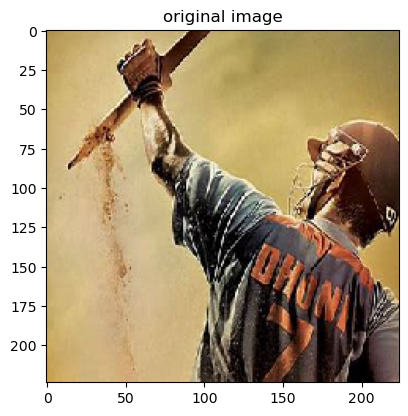

In [26]:
plt.figure(figsize=(10,300))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(original_array)


In [28]:
# Convert image to grey scale
model=models.Sequential()

# Sequentials() -->It allows us too create a linear stack of layers in a neural network
# You can add one layer at neural network at a time and each layer has connection only to the previous and next layer

model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))

# conv2D -->It represent 2D conventional Layer 

#Conventiional Layer -->>used to perform element wise
# multiplication or addition or division etc..

# layers.Conv2D(1) --> 1 is used to mention the number of filters in the conventional layer
#(3,3) --> set the size of filter
#(224,224,3) --> 224*224 --> pixels with 3 color channel(RGB)

model.add(layers.MaxPooling2D((2,2)))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 1)       0         
 g2D)                                                            
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 188ms/step


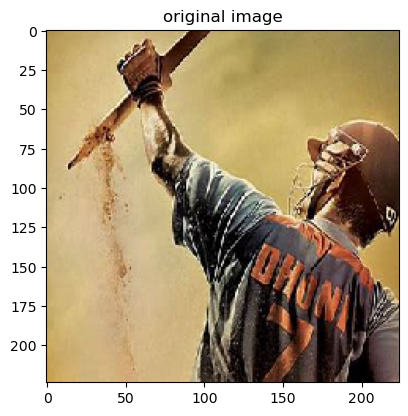

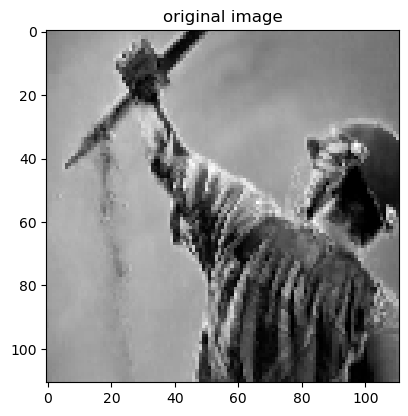

In [29]:
# To reshape the image
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

plt.figure(figsize=(10,300))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(original_array)

plt.figure(figsize=(10,300))
plt.subplot(1,2,1)
plt.title("original image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [36]:
pip install opencv-contrib-python

In [37]:
# Project 2

# Detect flowers based on images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras import backend as K
from keras.layers import Dense 
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn
import cv2 
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image


In [38]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR=r"C:\Users\SHANMUKH\Downloads\archive (4)-20240219T091756Z-001\archive (4)\train\daisy"
FLOWER_SUNFLOWER_DIR=r"C:\Users\SHANMUKH\Downloads\archive (4)-20240219T091756Z-001\archive (4)\train\sunflower"
FLOWER_TULIP_DIR=r"C:\Users\SHANMUKH\Downloads\archive (4)-20240219T091756Z-001\archive (4)\train\tulip"
FLOWER_DANDI_DIR=r"C:\Users\SHANMUKH\Downloads\archive (4)-20240219T091756Z-001\archive (4)\train\dandelion"
FLOWER_ROSE=r"C:\Users\SHANMUKH\Downloads\archive (4)-20240219T091756Z-001\archive (4)\train\rose"


In [39]:
def assign_label(img,flower_type):
    return flower_type


In [42]:
#tqdm -->>It creates a progress bar from the loop 

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [44]:
make_train_data('Daisy',FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:02<00:00, 197.42it/s]

1003


In [45]:
make_train_data('Daisy',FLOWER_SUNFLOWER_DIR)
print(len(X))


100%|██████████| 495/495 [00:07<00:00, 64.00it/s]

1498


In [46]:
make_train_data('Daisy',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 607/607 [00:09<00:00, 64.98it/s]

2105


In [47]:
make_train_data('Daisy',FLOWER_DANDI_DIR)
print(len(X))


100%|██████████| 646/646 [00:09<00:00, 65.77it/s]

2751


In [48]:
make_train_data('Daisy',FLOWER_ROSE)
print(len((X)))


100%|██████████| 497/497 [00:07<00:00, 63.69it/s]

3248


C:\Users\SHANMUKH\AppData\Local\Temp\ipykernel_15464\3155540616.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


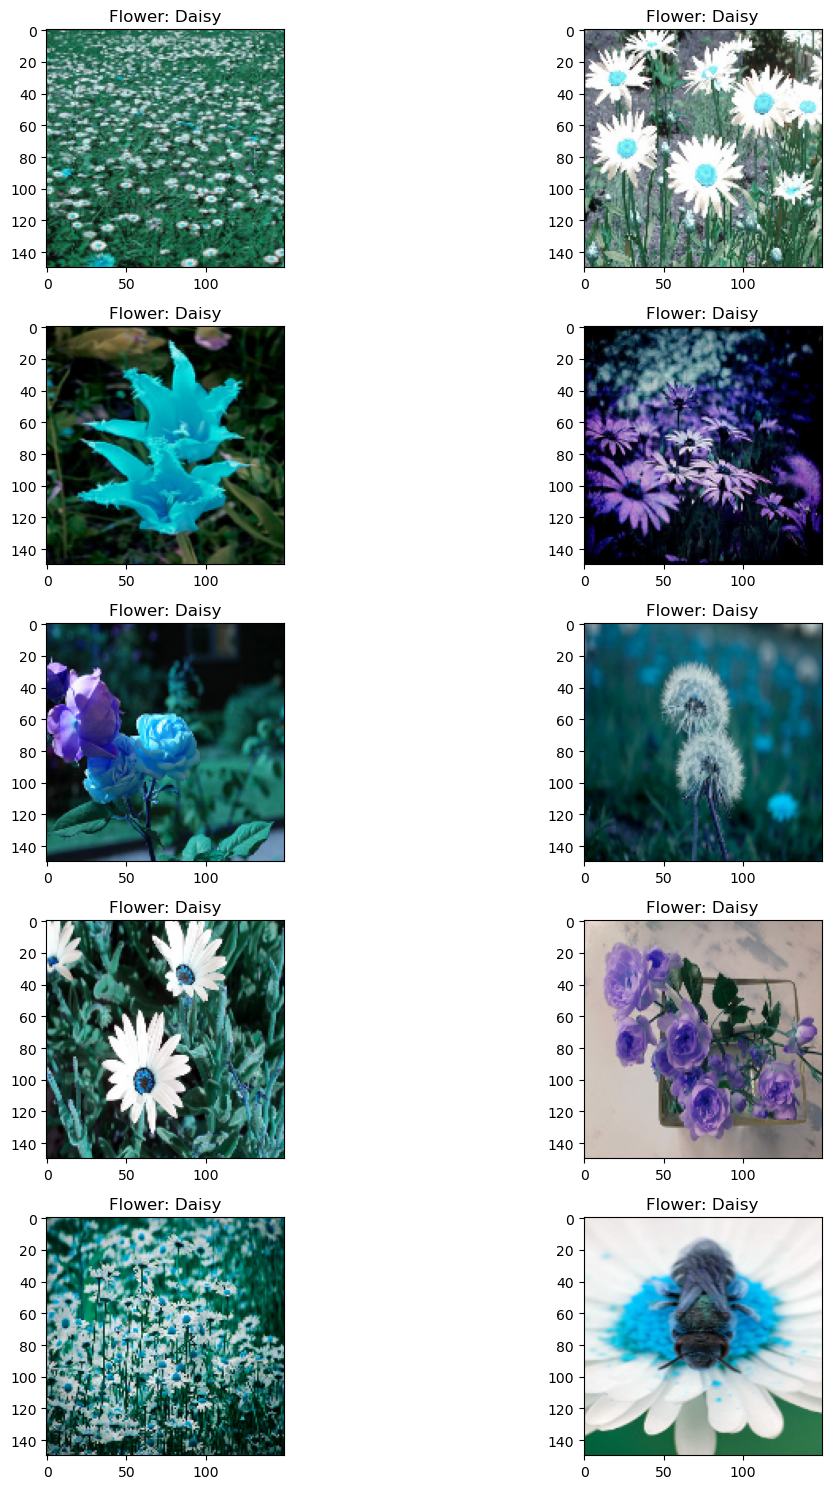

In [52]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()